<a href="https://colab.research.google.com/github/ggsgranados/TelecomX-LATAM-Parte-2/blob/main/Telecom_X_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports necesarios

In [22]:
!pip install tensorflow keras

In [23]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


##📌 Extracción del archivo tratado

In [24]:
# Importando el JSON y convirtiendolo a un DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/ggsgranados/TelecomX-LATAM-Parte-2/refs/heads/main/df_normalizado.csv')

In [25]:
df.head(5)

,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cuentas_Diarias,Churn_Label
0,0.0,0,9,65.6,593.30,1,0,0,1,0,...,1,0,0,1,0,0,0,1,2.155059,Permaneció
1,0.0,0,9,59.9,542.40,0,1,1,0,1,...,0,0,1,0,0,0,0,1,1.967806,Permaneció
2,1.0,0,4,73.9,280.85,0,1,1,0,1,...,0,0,0,1,0,0,1,0,2.427727,Se dio de baja
3,1.0,1,13,98.0,1237.85,0,1,0,1,1,...,0,0,0,1,0,0,1,0,3.219448,Se dio de baja
4,1.0,1,3,83.9,267.40,1,0,0,1,1,...,0,0,0,1,0,0,0,1,2.756242,Se dio de baja


##❌ Eliminación de columnas irrelevantes

In [26]:
def remove_negative_dummies(df):
    columns_to_drop = []
    for col in df.columns:
        # Buscar columnas que terminen en '_No' o '_no'
        if col.endswith('_No') or col.endswith('_no'):
            # Identificar la columna correspondiente con lógica positiva
            positive_col_name_yes = col.replace('_No', '_Yes').replace('_no', '_yes')
            positive_col_name_blank = col.replace('_No', '_ ').replace('_no', '_ ')
            positive_col_name_single = col.replace('_No', '').replace('_no', '')

            # Verificar si la columna de lógica positiva existe
            if positive_col_name_yes in df.columns or positive_col_name_blank in df.columns or positive_col_name_single in df.columns:
                columns_to_drop.append(col)

    if columns_to_drop:
        print(f"\nEliminando las siguientes columnas con lógica negativa: {columns_to_drop}")
        df = df.drop(columns=columns_to_drop)
    else:
        print("\nNo se encontraron columnas con lógica negativa ('_No' o '_no') para eliminar.")

    return df

# Aplicar la función al DataFrame
df_normalizado = remove_negative_dummies(df)

print("\nColumnas después de eliminar las de lógica negativa:")
print(df_normalizado.columns.tolist())
print("\nEstado final del DataFrame:")
print(df_normalizado.info())


Eliminando las siguientes columnas con lógica negativa: ['Partner_No', 'Dependents_No', 'PhoneService_No', 'MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No', 'PaperlessBilling_No']

Columnas después de eliminar las de lógica negativa:
['Churn', 'SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total', 'gender_Female', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contrac

In [27]:
# Columnas a eliminar
columns_to_drop = ['gender_Female', 'Churn_Label']

# Verificar si las columnas existen en el DataFrame antes de eliminarlas
existing_columns_to_drop = [col for col in columns_to_drop if col in df_normalizado.columns]

if existing_columns_to_drop:
    print(f"\nEliminando las siguientes columnas: {existing_columns_to_drop}")
    df_normalizado = df_normalizado.drop(columns=existing_columns_to_drop)
else:
    print("\nLas columnas 'gender_Female' y 'Churn_Label' no se encontraron en el DataFrame.")

print("\nColumnas después de eliminar gender_Female y Churn_Label:")
print(df_normalizado.columns.tolist())
print("\nEstado final del DataFrame:")
print(df_normalizado.info())



Eliminando las siguientes columnas: ['gender_Female', 'Churn_Label']

Columnas después de eliminar gender_Female y Churn_Label:
['Churn', 'SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Cuentas

## ✅ Verificación de la proporción de cancelación (Churn)

In [28]:
churn_proportion = df_normalizado['Churn'].value_counts(normalize=True)
print("\nProporción de clientes que cancelaron (Churn = 1) vs. activos (Churn = 0) :")
churn_proportion



Proporción de clientes que cancelaron (Churn = 1) vs. activos (Churn = 0) :


,proportion
Churn,
0.0,0.73463
1.0,0.26537


## ⚖️ Balanceo de clases

In [29]:
# Verificando valores NaN
if df_normalizado['Churn'].isnull().any():
    print("\Advertencia: Velores NaN encontrados. Eliminando valores NaN")
    df_normalizado.dropna(subset=['Churn'], inplace=True)

# Separando clases
df_majority = df_normalizado[df_normalizado.Churn==0]
df_minority = df_normalizado[df_normalizado.Churn==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=123) # estado aleatorio para reproducibilidad

# combinando clases
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Mostrando nuevas clases
print("\nProporción de clases después del balanceo:")
print(df_balanced.Churn.value_counts(normalize=True))

print("\nEstado final del DataFrame balanceado:")
print(df_balanced.info())

# Asignando el balanceo
df_normalizado = df_balanced

\Advertencia: Velores NaN encontrados. Eliminando valores NaN

Proporción de clases después del balanceo:
Churn
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

Estado final del DataFrame balanceado:
<class 'pandas.core.frame.DataFrame'>
Index: 10348 entries, 0 to 6827
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Churn                                    10348 non-null  float64
 1   SeniorCitizen                            10348 non-null  int64  
 2   tenure                                   10348 non-null  int64  
 3   Charges.Monthly                          10348 non-null  float64
 4   Charges.Total                            10348 non-null  float64
 5   gender_Male                              10348 non-null  int64  
 6   Partner_Yes                              10348 non-null  int64  
 7   Dependents_Yes                           10348 non-null

In [30]:
df_normalizado.head(5)

,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cuentas_Diarias
0,0.0,0,9,65.60,593.30,0,1,1,1,0,...,0,0,1,0,1,0,0,0,1,2.155059
1,0.0,0,9,59.90,542.40,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,1.967806
5,0.0,0,9,69.40,571.45,0,0,1,1,0,...,1,1,0,0,1,0,1,0,0,2.279895
6,0.0,1,71,109.70,7904.25,0,1,0,1,0,...,1,0,0,1,1,1,0,0,0,3.603811
7,0.0,0,63,84.65,5377.80,1,1,0,1,0,...,0,0,0,1,1,0,1,0,0,2.780880


## 🔧 Normalización/Estandarización

In [31]:
# ## 🤖 Preparación de datos para el modelo (Normalización/Estandarización)

# Evaluar la necesidad de normalizar o estandarizar los datos.
# La estandarización (usando StandardScaler) es más adecuada cuando los datos siguen una distribución gaussiana.
# La normalización (usando MinMaxScaler) es más adecuada cuando se necesita que los datos estén en un rango específico [0, 1]
# o cuando los datos no siguen una distribución gaussiana y pueden tener valores atípicos.
# Dado que algunas características pueden no seguir una distribución gaussiana y para mantener los datos en un rango similar,
# se utilizará MinMaxScaler.

print("\nPreparando datos para el modelo: Normalización/Estandarización")

# Separar características (X) y variable objetivo (y)
X = df_normalizado.drop('Churn', axis=1)
y = df_normalizado['Churn']

# Identificar columnas numéricas para escalar (excluir las dummy/binarias)
# Las columnas dummy ya están en el rango [0, 1], por lo que no necesitan normalización.
# Suponemos que las columnas numéricas son aquellas con dtype float64 o int64, excluyendo la columna 'Churn' que ya se separó.
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()

print(f"\nColumnas numéricas a escalar: {numeric_cols}")

# Inicializar el escalador (MinMaxScaler)
scaler = MinMaxScaler()

# Aplicar normalización solo a las columnas numéricas
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

print("\nDatos escalados (MinMaxScaler) aplicados a columnas numéricas.")

print("\nEstado final del DataFrame después de la normalización:")
print(X.info())


Preparando datos para el modelo: Normalización/Estandarización

Columnas numéricas a escalar: ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Cuentas_Diarias']

Datos escalados (MinMaxScaler) 

In [32]:
# Mostrar una muestra de los datos escalados
print("\nPrimeras 5 filas del DataFrame con datos escalados:")
X.head(5)


Primeras 5 filas del DataFrame con datos escalados:


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cuentas_Diarias
0,0.0,0.125000,0.471144,0.068315,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.471144
1,0.0,0.125000,0.414428,0.062454,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.414428
5,0.0,0.125000,0.508955,0.065799,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.508955
6,1.0,0.986111,0.909950,0.910125,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.909950
7,0.0,0.875000,0.660697,0.619220,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.660697


## ⛓️ Análisis de correlación


Matriz de Correlación de las variables:
                                         SeniorCitizen    tenure  \
SeniorCitizen                                 1.000000  0.007692   
tenure                                        0.007692  1.000000   
Charges.Monthly                               0.204081  0.221379   
Charges.Total                                 0.081321  0.856156   
gender_Male                                   0.000100  0.019886   
Partner_Yes                                   0.024031  0.381754   
Dependents_Yes                               -0.217833  0.174066   
PhoneService_Yes                              0.009509  0.014658   
MultipleLines_No phone service               -0.009509 -0.014658   
MultipleLines_Yes                             0.151180  0.312792   
InternetService_DSL                          -0.119179  0.012664   
InternetService_Fiber optic                   0.244469 -0.015390   
InternetService_No                           -0.179493  0.004886   
OnlineS

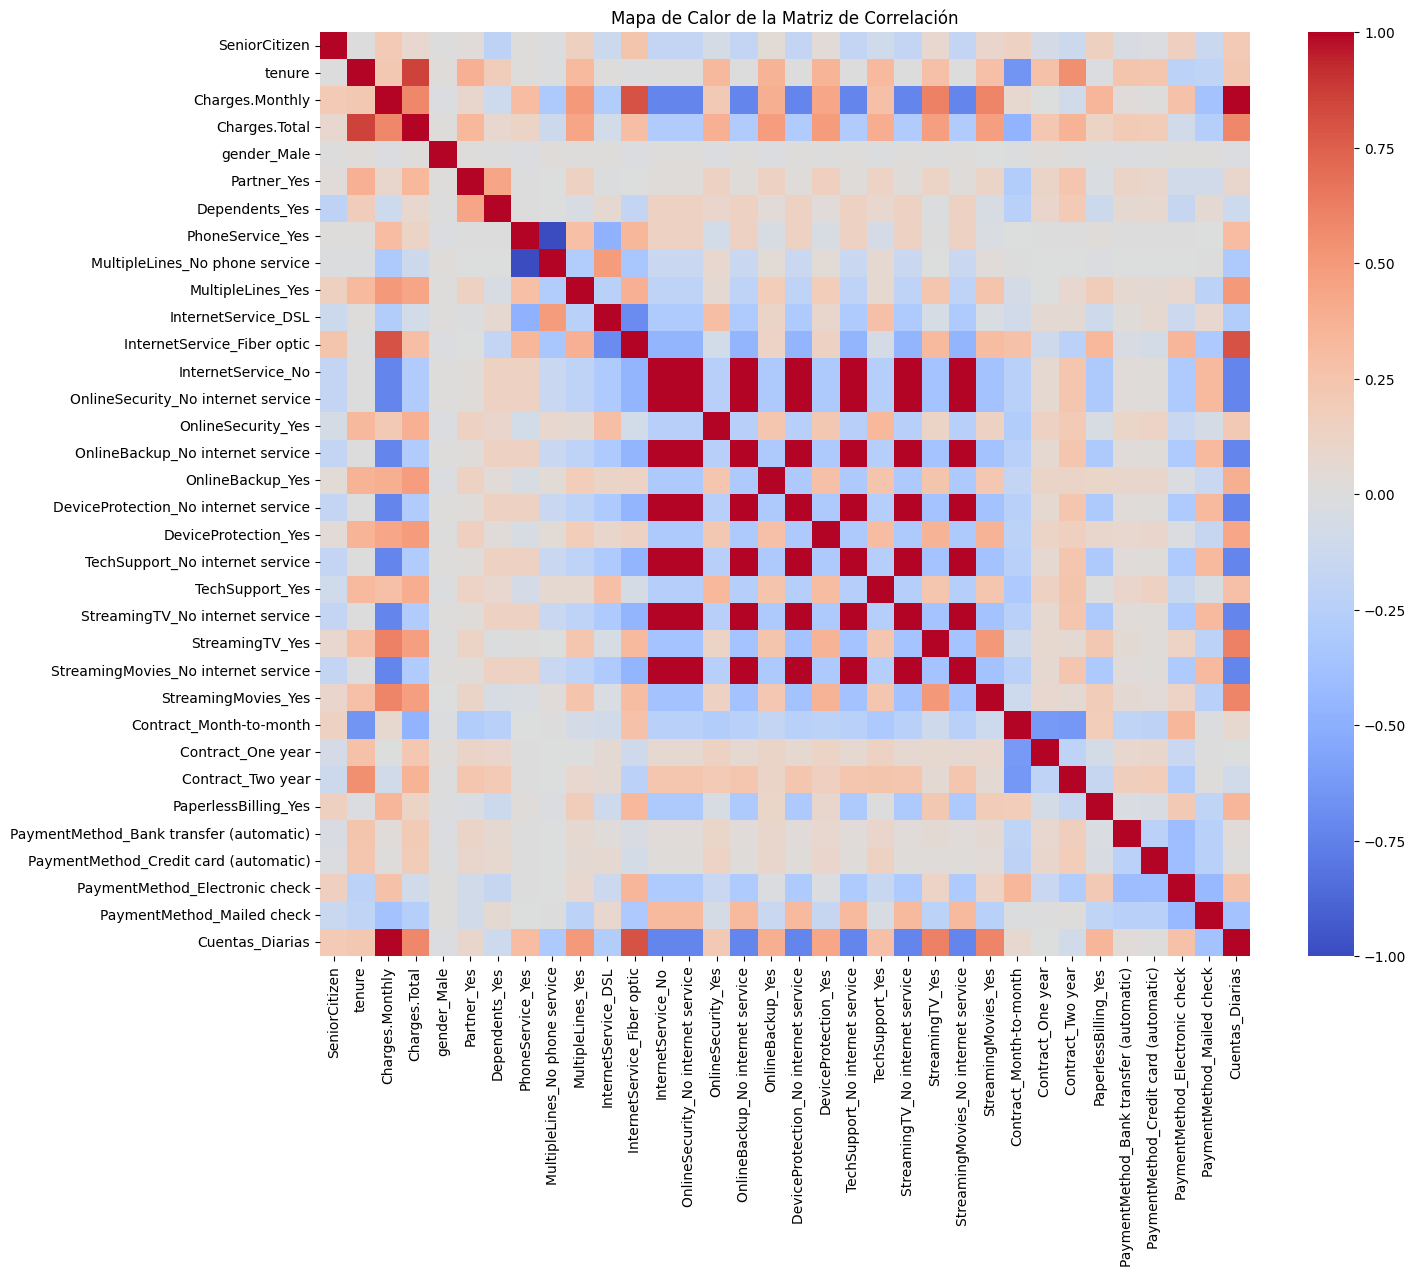


Correlación de las variables con la variable objetivo 'Churn':
Churn                                      1.000000
Contract_Month-to-month                    0.483068
InternetService_Fiber optic                0.347631
PaymentMethod_Electronic check             0.336818
Charges.Monthly                            0.229378
Cuentas_Diarias                            0.229378
PaperlessBilling_Yes                       0.219138
SeniorCitizen                              0.159411
StreamingTV_Yes                            0.073714
StreamingMovies_Yes                        0.070878
MultipleLines_Yes                          0.048744
PhoneService_Yes                           0.007850
MultipleLines_No phone service            -0.007850
gender_Male                               -0.012370
DeviceProtection_Yes                      -0.079399
OnlineBackup_Yes                          -0.088804
PaymentMethod_Mailed check                -0.112698
InternetService_DSL                       -0.145399


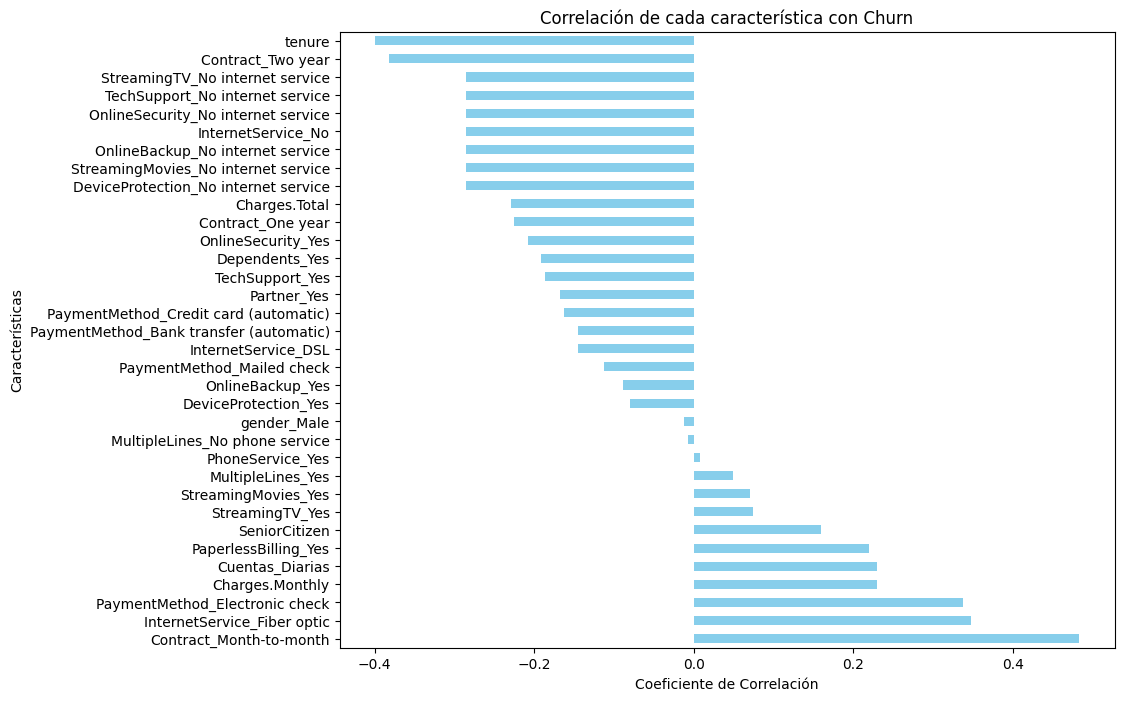

In [33]:
# Calcular la matriz de correlación
correlation_matrix = X.corr()

# Imprimir la matriz de correlación
print("\nMatriz de Correlación de las variables:")
print(correlation_matrix)

# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()


# Dado que 'Churn' se separó en 'y', podemos calcular la correlación de cada característica con 'y'
# Esto requiere concatenar X e y temporalmente o calcular la correlación por separado.
# Uniendo temporalmente X e y para calcular la correlación con la variable objetivo
df_combined = pd.concat([X, y], axis=1)

# Calcular la matriz de correlación del DataFrame combinado
correlation_matrix_combined = df_combined.corr()

# Extraer la correlación de todas las variables con 'Churn'
correlation_with_churn = correlation_matrix_combined['Churn'].sort_values(ascending=False)

print("\nCorrelación de las variables con la variable objetivo 'Churn':")
print(correlation_with_churn)

# Visualizar la correlación con 'Churn'
plt.figure(figsize=(10, 8))
correlation_with_churn.drop('Churn').plot(kind='barh', color='skyblue')
plt.title('Correlación de cada característica con Churn')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Características')
plt.show()

# Eliminar el DataFrame combinado temporal
del df_combined

## 📊 Análisis dirigido

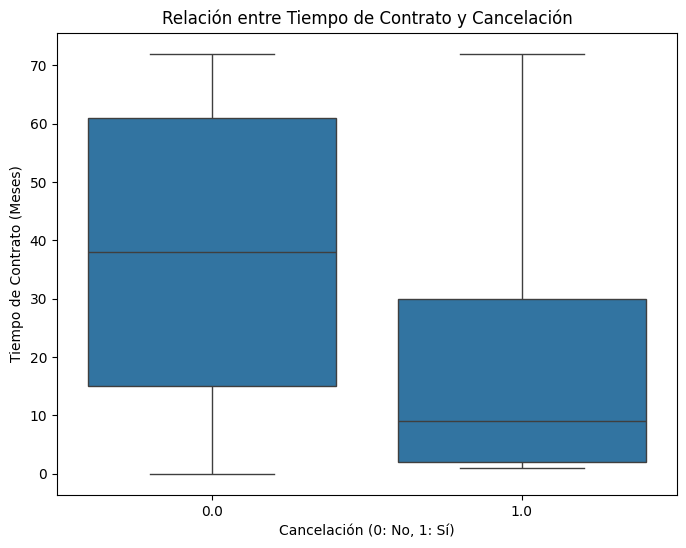

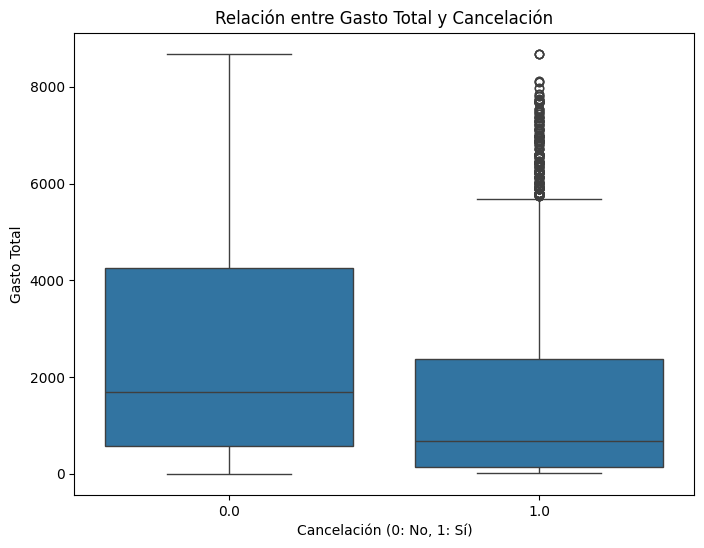

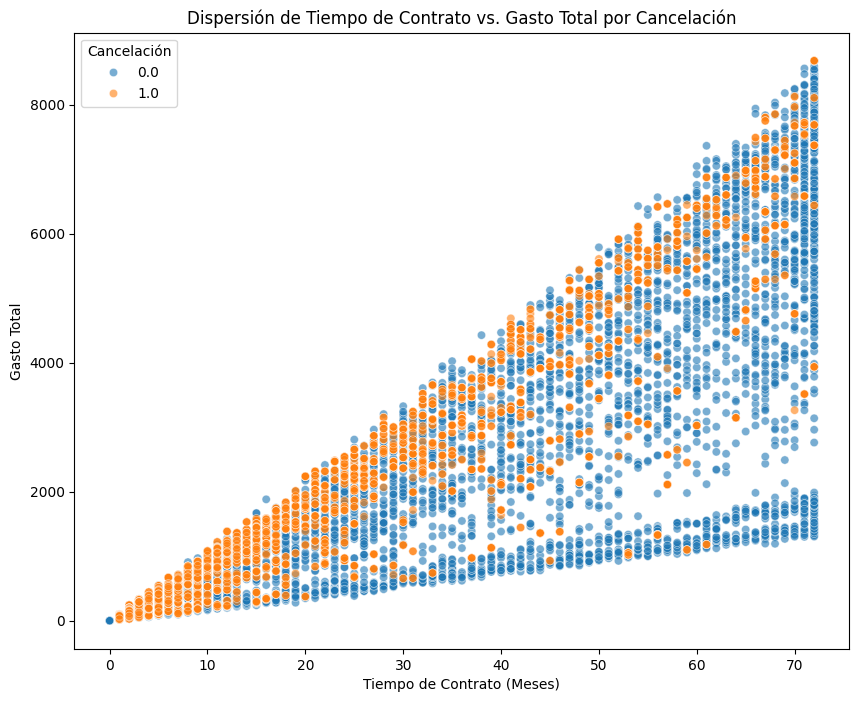

In [34]:
# Análisis de 'Tiempo de contrato' (tenure) vs. Cancelación (Churn)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df_normalizado)
plt.title('Relación entre Tiempo de Contrato y Cancelación')
plt.xlabel('Cancelación (0: No, 1: Sí)')
plt.ylabel('Tiempo de Contrato (Meses)')
plt.show()

# Análisis de 'Gasto total' (Charges.Total) vs. Cancelación (Churn)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Total', data=df_normalizado)
plt.title('Relación entre Gasto Total y Cancelación')
plt.xlabel('Cancelación (0: No, 1: Sí)')
plt.ylabel('Gasto Total')
plt.show()

# Scatter plot de 'tenure' vs 'Charges.Total' coloreado por 'Churn'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tenure', y='Charges.Total', hue='Churn', data=df_normalizado, alpha=0.6)
plt.title('Dispersión de Tiempo de Contrato vs. Gasto Total por Cancelación')
plt.xlabel('Tiempo de Contrato (Meses)')
plt.ylabel('Gasto Total')
plt.legend(title='Cancelación')
plt.show()


## ✂️ Separación de datos

In [35]:
print("\nDividiendo el conjunto de datos en entrenamiento y prueba (80/20)")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nForma del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Forma del conjunto de prueba (X_test): {X_test.shape}")
print(f"Forma de la variable objetivo de entrenamiento (y_train): {y_train.shape}")
print(f"Forma de la variable objetivo de prueba (y_test): {y_test.shape}")

# Verificar la proporción de Churn en los conjuntos de entrenamiento y prueba después de la estratificación
print("\nProporción de Churn en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nProporción de Churn en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))


Dividiendo el conjunto de datos en entrenamiento y prueba (80/20)

Forma del conjunto de entrenamiento (X_train): (8278, 34)
Forma del conjunto de prueba (X_test): (2070, 34)
Forma de la variable objetivo de entrenamiento (y_train): (8278,)
Forma de la variable objetivo de prueba (y_test): (2070,)

Proporción de Churn en el conjunto de entrenamiento:
Churn
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64

Proporción de Churn en el conjunto de prueba:
Churn
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


## 🧠 Creación de modelos

### Regresión logística


Entrenando el modelo de Regresión Logística...
Entrenamiento completado.

Realizando predicciones en el conjunto de prueba...
Predicciones completadas.

Evaluando el rendimiento del modelo de Regresión Logística:

Precisión (Accuracy): 76.3768 %

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.79      0.72      0.75      1035
         1.0       0.74      0.80      0.77      1035

    accuracy                           0.76      2070
   macro avg       0.77      0.76      0.76      2070
weighted avg       0.77      0.76      0.76      2070


Matriz de Confusión:
[[748 287]
 [202 833]]


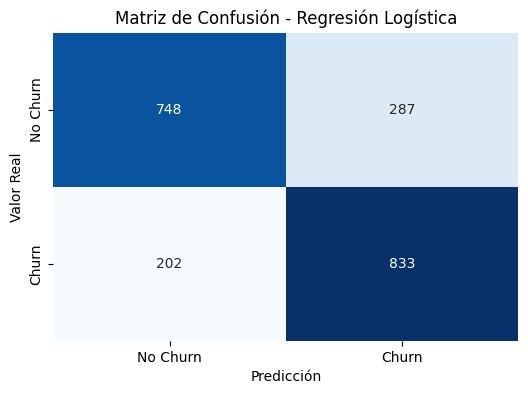

In [36]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar el modelo de Regresión Logística
model_lr = LogisticRegression(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
print("\nEntrenando el modelo de Regresión Logística...")
model_lr.fit(X_train, y_train)
print("Entrenamiento completado.")

# Predecir en el conjunto de prueba
print("\nRealizando predicciones en el conjunto de prueba...")
y_pred_lr = model_lr.predict(X_test)
print("Predicciones completadas.")

# Evaluar el rendimiento del modelo
print("\nEvaluando el rendimiento del modelo de Regresión Logística:")

# Calcular la precisión
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"\nPrecisión (Accuracy): {accuracy_lr*100:.4f} %")

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_lr))

# Mostrar la matriz de confusión
print("\nMatriz de Confusión:")
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(conf_matrix_lr)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

### KNN


Entrenando el modelo KNN...
Entrenamiento completado.

Realizando predicciones en el conjunto de prueba...
Predicciones completadas.

Evaluando el rendimiento del modelo KNN:

Precisión (Accuracy): 78.3575 %

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.84      0.70      0.76      1035
         1.0       0.74      0.87      0.80      1035

    accuracy                           0.78      2070
   macro avg       0.79      0.78      0.78      2070
weighted avg       0.79      0.78      0.78      2070


Matriz de Confusión:
[[723 312]
 [136 899]]


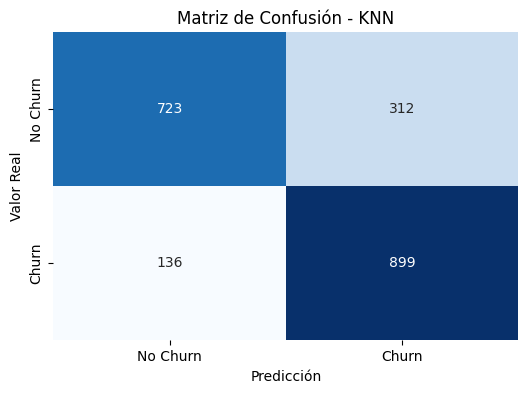

In [37]:
# Inicializar el modelo KNN
# Ajustar el número de vecinos (n_neighbors) según sea necesario.
# Valor inicial es 5.
model_knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo con los datos de entrenamiento
print("\nEntrenando el modelo KNN...")
model_knn.fit(X_train, y_train)
print("Entrenamiento completado.")

# Predecir en el conjunto de prueba
print("\nRealizando predicciones en el conjunto de prueba...")
y_pred_knn = model_knn.predict(X_test)
print("Predicciones completadas.")

# Evaluar el rendimiento del modelo
print("\nEvaluando el rendimiento del modelo KNN:")

# Calcular la precisión
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"\nPrecisión (Accuracy): {accuracy_knn*100:.4f} %")

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_knn))

# Mostrar la matriz de confusión
print("\nMatriz de Confusión:")
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(conf_matrix_knn)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - KNN')
plt.show()


### Random forest


Entrenando el modelo Random Forest...
Entrenamiento completado.

Realizando predicciones en el conjunto de prueba...
Predicciones completadas.

Evaluando el rendimiento del modelo Random Forest:

Precisión (Accuracy): 90.1932 %

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90      1035
         1.0       0.86      0.96      0.91      1035

    accuracy                           0.90      2070
   macro avg       0.91      0.90      0.90      2070
weighted avg       0.91      0.90      0.90      2070


Matriz de Confusión:
[[878 157]
 [ 46 989]]


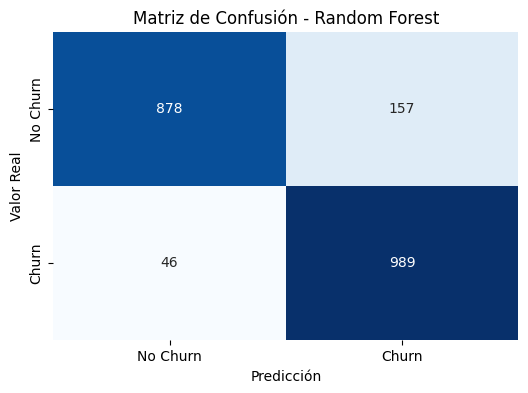


Importancia de las características en el modelo Random Forest:


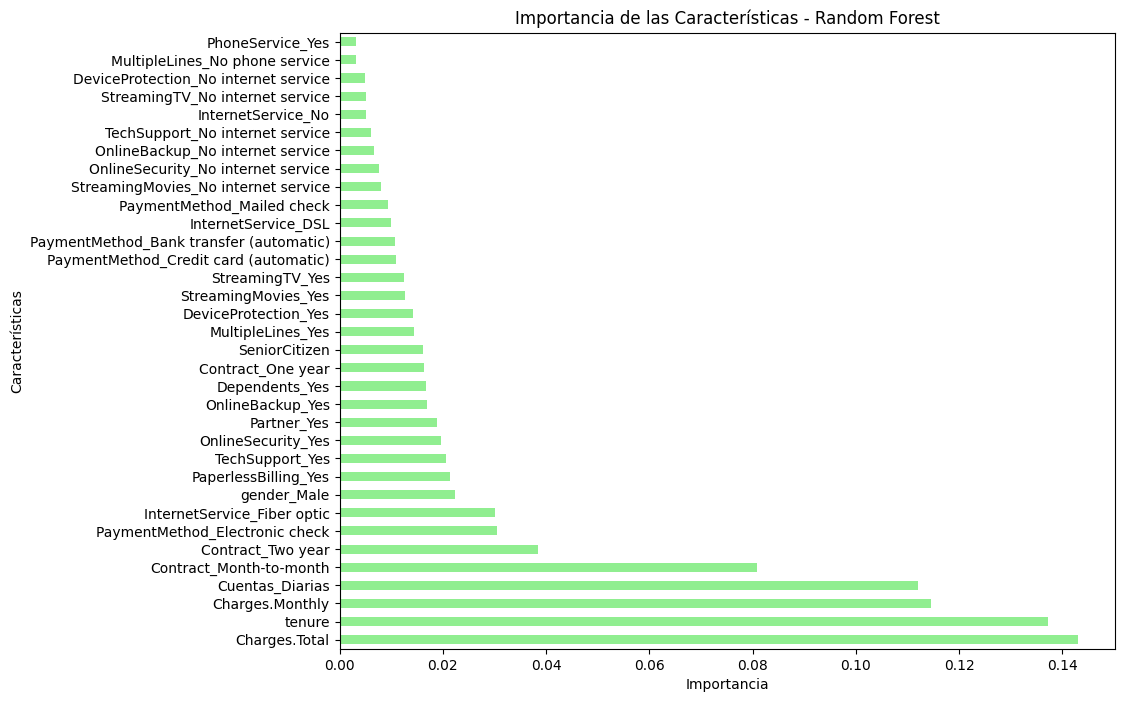

In [38]:
# Inicializar el modelo Random Forest
# Ajustar hiperparámetros (n_estimators, max_depth, etc.) según sea necesario.
# n_estimators: número de árboles en el bosque (un valor común es 100 o más).
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
print("\nEntrenando el modelo Random Forest...")
model_rf.fit(X_train, y_train)
print("Entrenamiento completado.")

# Predecir en el conjunto de prueba
print("\nRealizando predicciones en el conjunto de prueba...")
y_pred_rf = model_rf.predict(X_test)
print("Predicciones completadas.")

# Evaluar el rendimiento del modelo
print("\nEvaluando el rendimiento del modelo Random Forest:")

# Calcular la precisión
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nPrecisión (Accuracy): {accuracy_rf*100:.4f} %")

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

# Mostrar la matriz de confusión
print("\nMatriz de Confusión:")
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

# Mostrar la importancia de las características
print("\nImportancia de las características en el modelo Random Forest:")
feature_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
feature_importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Importancia de las Características - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

### SVM


Entrenando el modelo SVM...
Entrenamiento completado.

Realizando predicciones en el conjunto de prueba...
Predicciones completadas.

Evaluando el rendimiento del modelo SVM:

Precisión (Accuracy): 78.2126 %

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.82      0.73      0.77      1035
         1.0       0.75      0.84      0.79      1035

    accuracy                           0.78      2070
   macro avg       0.79      0.78      0.78      2070
weighted avg       0.79      0.78      0.78      2070


Matriz de Confusión:
[[754 281]
 [170 865]]


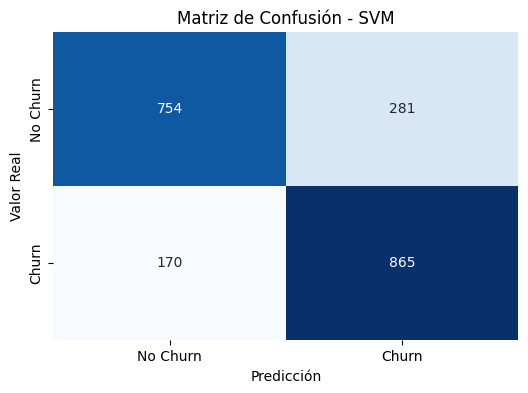

In [39]:
# Inicializar el modelo
# Considerar ajustar el kernel ('linear', 'poly', 'rbf', 'sigmoid') y los hiperparámetros (C, gamma).
# rbf es un kernel común y a menudo funciona bien.
model_svm = SVC(kernel='rbf', random_state=42)

# Entrenar el modelo con los datos de entrenamiento
print("\nEntrenando el modelo SVM...")
model_svm.fit(X_train, y_train)
print("Entrenamiento completado.")

# Predecir en el conjunto de prueba
print("\nRealizando predicciones en el conjunto de prueba...")
y_pred_svm = model_svm.predict(X_test)
print("Predicciones completadas.")

# Evaluar el rendimiento del modelo
print("\nEvaluando el rendimiento del modelo SVM:")

# Calcular la precisión
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"\nPrecisión (Accuracy): {accuracy_svm*100:.4f} %")

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_svm))

# Mostrar la matriz de confusión
print("\nMatriz de Confusión:")
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(conf_matrix_svm)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - SVM')
plt.show()


### Árbol de decisión


Realizando búsqueda en cuadrícula y entrenando el modelo de Árbol de Decisión...
Búsqueda en cuadrícula y entrenamiento completados.

Mejores hiperparámetros encontrados: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Usando el mejor modelo de Árbol de Decisión para predicciones...
Predicciones completadas.

Evaluando el rendimiento del mejor modelo de Árbol de Decisión:

Precisión (Accuracy): 89.4686 %

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89      1035
         1.0       0.86      0.94      0.90      1035

    accuracy                           0.89      2070
   macro avg       0.90      0.89      0.89      2070
weighted avg       0.90      0.89      0.89      2070


Matriz de Confusión:
[[874 161]
 [ 57 978]]


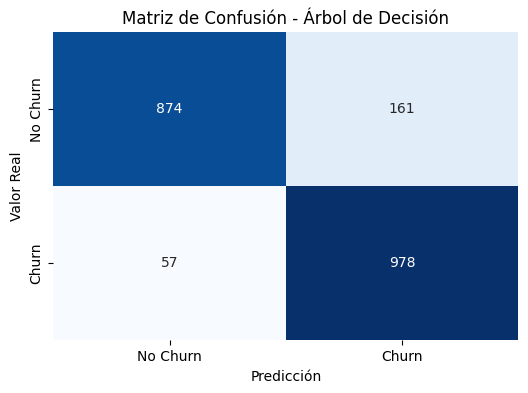


Importancia de las características en el mejor modelo de Árbol de Decisión:


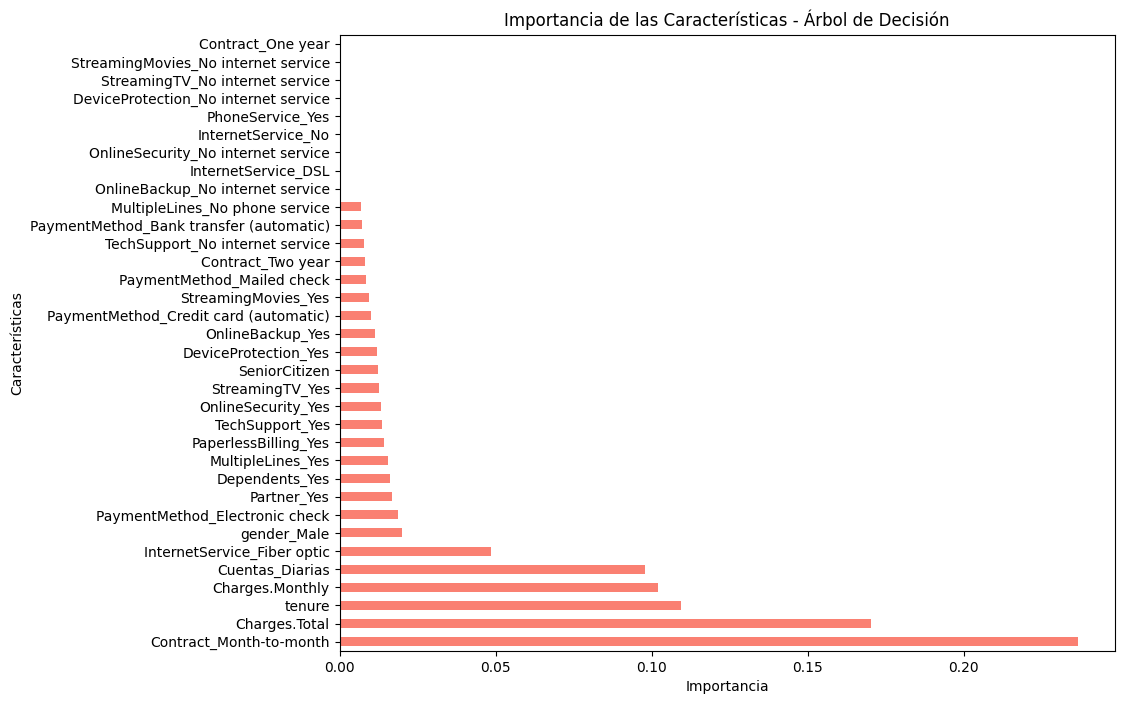

In [40]:
# Inicializar el modelo de Árbol de Decisión
model_dt = DecisionTreeClassifier(random_state=42)

# Definir la cuadrícula de hiperparámetros a optimizar
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20], # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10], # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4] # Número mínimo de muestras requeridas para estar en un nodo hoja
}

# Configurar la búsqueda en cuadrícula con validación cruzada
# cv=5 indica validación cruzada con 5 pliegues
grid_search_dt = GridSearchCV(model_dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo con la búsqueda en cuadrícula en los datos de entrenamiento
print("\nRealizando búsqueda en cuadrícula y entrenando el modelo de Árbol de Decisión...")
grid_search_dt.fit(X_train, y_train)
print("Búsqueda en cuadrícula y entrenamiento completados.")

# Obtener los mejores hiperparámetros encontrados
best_params_dt = grid_search_dt.best_params_
print(f"\nMejores hiperparámetros encontrados: {best_params_dt}")

# Obtener el mejor modelo encontrado por GridSearchCV
best_model_dt = grid_search_dt.best_estimator_
print("\nUsando el mejor modelo de Árbol de Decisión para predicciones...")

# Predecir en el conjunto de prueba con el mejor modelo
y_pred_dt = best_model_dt.predict(X_test)
print("Predicciones completadas.")

# Evaluar el rendimiento del mejor modelo
print("\nEvaluando el rendimiento del mejor modelo de Árbol de Decisión:")

# Calcular la precisión
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nPrecisión (Accuracy): {accuracy_dt*100:.4f} %")

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_dt))

# Mostrar la matriz de confusión
print("\nMatriz de Confusión:")
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(conf_matrix_dt)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

# Mostrar la importancia de las características para el mejor modelo de árbol de decisión
print("\nImportancia de las características en el mejor modelo de Árbol de Decisión:")
feature_importances_dt = pd.Series(best_model_dt.feature_importances_, index=X_train.columns)
feature_importances_dt_sorted = feature_importances_dt.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
feature_importances_dt_sorted.plot(kind='barh', color='salmon')
plt.title('Importancia de las Características - Árbol de Decisión')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()


### Red neuronal

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         4,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,801 (50.00 KB)

 Trainable params: 12,801 (50.00 KB)

 Non-trainable params: 0 (0.00 B)


Entrenando la red neuronal...
Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7141 - loss: 0.5593 - val_accuracy: 0.7506 - val_loss: 0.5184
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7622 - loss: 0.4871 - val_accuracy: 0.7542 - val_loss: 0.5109
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7618 - loss: 0.4921 - val_accuracy: 0.7548 - val_loss: 0.5130
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7703 - loss: 0.4836 - val_accuracy: 0.7506 - val_loss: 0.5196
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7751 - loss: 0.4774 - val_accuracy: 0.7585 - val_loss: 0.5087
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7761 - loss: 0.4734 - val_accuracy: 0.7609 - val_loss: 0.5078
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7789 - loss: 0.4723 - val_accuracy: 0.7536 - val_loss: 0.5109
Epoch 8/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7731 - 

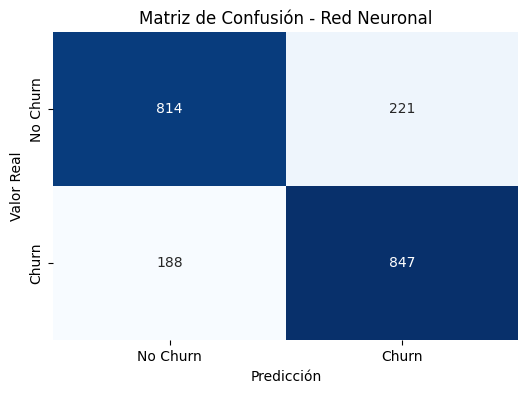


Visualizando el historial de entrenamiento:


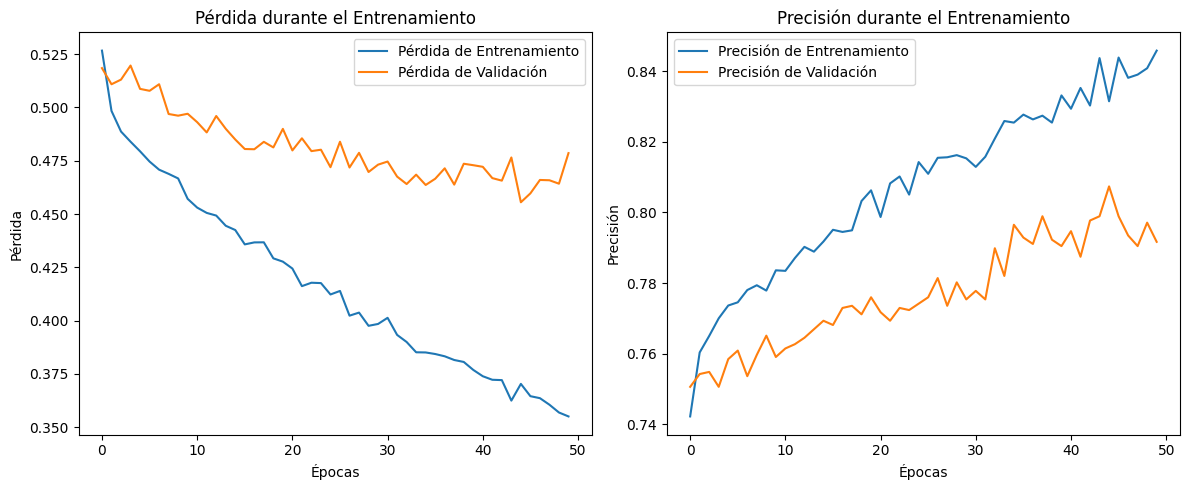

In [41]:
# Definir la arquitectura de la red neuronal
# El número de unidades en la primera capa 'Dense' es un punto de partida,
# puede ajustarse según la complejidad de los datos.
# 'relu' es una función de activación común para las capas ocultas.
# 'sigmoid' es adecuada para la capa de salida en problemas de clasificación binaria.
# La capa de Dropout puede ayudar a prevenir el sobreajuste.

model_nn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)), # Capa de entrada y primera capa oculta
    Dropout(0.3), # Capa de Dropout
    Dense(64, activation='relu'), # Segunda capa oculta
    Dropout(0.3), # Capa de Dropout
    Dense(1, activation='sigmoid') # Capa de salida para clasificación binaria
])

# Compilar el modelo
# 'adam' es un optimizador común y eficiente.
# 'binary_crossentropy' es la función de pérdida adecuada para clasificación binaria.
# 'accuracy' es la métrica a monitorear.
optimizer = Adam(learning_rate=0.001)
model_nn.compile(optimizer=optimizer,
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Mostrar un resumen de la arquitectura del modelo
model_nn.summary()

# Entrenar la red neuronal
# epochs: número de veces que el modelo verá todo el conjunto de entrenamiento.
# batch_size: número de muestras por actualización de gradiente.
# validation_split: fracción de los datos de entrenamiento a usar para validación.
print("\nEntrenando la red neuronal...")
history = model_nn.fit(X_train, y_train,
                       epochs=50, # Puedes ajustar el número de épocas
                       batch_size=32, # Puedes ajustar el tamaño del batch
                       validation_split=0.2, # Usar 20% de X_train para validación
                       verbose=1)
print("Entrenamiento completado.")

# Evaluar el modelo en el conjunto de prueba
print("\nEvaluando el rendimiento de la red neuronal en el conjunto de prueba:")
loss_nn, accuracy_nn = model_nn.evaluate(X_test, y_test, verbose=0)

print(f"\nPérdida (Loss): {loss_nn:.4f}")
print(f"Precisión (Accuracy): {accuracy_nn*100:.4f} %")

# Realizar predicciones en el conjunto de prueba
# Las predicciones de una capa de salida 'sigmoid' son probabilidades (entre 0 y 1).
# Se umbralizan a 0 o 1 para obtener las clases predichas.
y_pred_prob_nn = model_nn.predict(X_test)
y_pred_nn = (y_pred_prob_nn > 0.5).astype(int) # Umbral de 0.5 para clasificación binaria

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_nn))

# Mostrar la matriz de confusión
print("\nMatriz de Confusión:")
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
print(conf_matrix_nn)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Red Neuronal')
plt.show()

# Visualizar el historial de entrenamiento (pérdida y precisión)
print("\nVisualizando el historial de entrenamiento:")
plt.figure(figsize=(12, 5))

# Graficar la pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Graficar la precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

##📝 Evaluación de los modelos


--- Métricas de Regresión Logística ---
Exactitud: 0.7638
Precisión: 0.7438
Recall: 0.8048
F1-score: 0.7731
Matriz de Confusión:
[[748 287]
 [202 833]]

--- Métricas de KNN ---
Exactitud: 0.7836
Precisión: 0.7424
Recall: 0.8686
F1-score: 0.8005
Matriz de Confusión:
[[723 312]
 [136 899]]

--- Métricas de Random Forest ---
Exactitud: 0.9019
Precisión: 0.8630
Recall: 0.9556
F1-score: 0.9069
Matriz de Confusión:
[[878 157]
 [ 46 989]]

--- Métricas de SVM ---
Exactitud: 0.7821
Precisión: 0.7548
Recall: 0.8357
F1-score: 0.7932
Matriz de Confusión:
[[754 281]
 [170 865]]

--- Métricas de Árbol de Decisión ---
Exactitud: 0.8947
Precisión: 0.8586
Recall: 0.9449
F1-score: 0.8997
Matriz de Confusión:
[[874 161]
 [ 57 978]]

--- Métricas de Red Neuronal ---
Exactitud: 0.8024
Precisión: 0.7931
Recall: 0.8184
F1-score: 0.8055
Matriz de Confusión:
[[814 221]
 [188 847]]

--- Análisis Comparativo de Modelos ---

Tabla Comparativa de Métricas:
                 Model  Accuracy  Precision  Recall  F1-

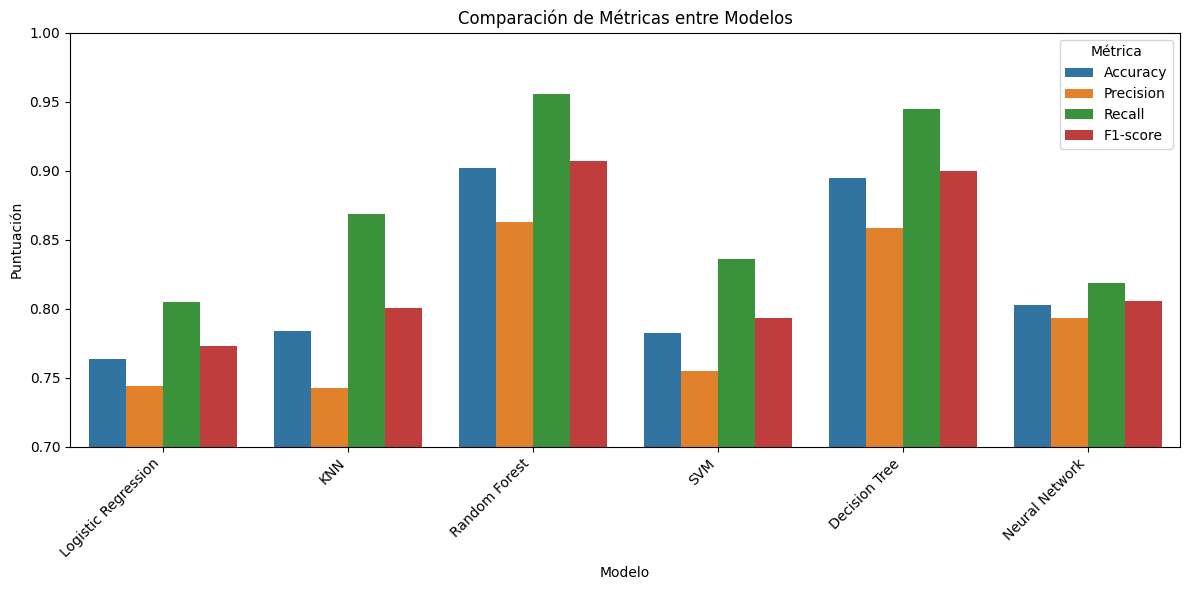

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Diccionario para almacenar las métricas de cada modelo
model_metrics = {}

# --- Evaluación y Almacenamiento de Métricas ---

# Regresión Logística
print("\n--- Métricas de Regresión Logística ---")
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

print(f"Exactitud: {accuracy_lr:.4f}")
print(f"Precisión: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")
print("Matriz de Confusión:")
print(conf_matrix_lr)

model_metrics['Logistic Regression'] = {
    'Accuracy': accuracy_lr,
    'Precision': precision_lr,
    'Recall': recall_lr,
    'F1-score': f1_lr,
    'Confusion Matrix': conf_matrix_lr
}

# KNN
print("\n--- Métricas de KNN ---")
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"Exactitud: {accuracy_knn:.4f}")
print(f"Precisión: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-score: {f1_knn:.4f}")
print("Matriz de Confusión:")
print(conf_matrix_knn)

model_metrics['KNN'] = {
    'Accuracy': accuracy_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1-score': f1_knn,
    'Confusion Matrix': conf_matrix_knn
}

# Random Forest
print("\n--- Métricas de Random Forest ---")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Exactitud: {accuracy_rf:.4f}")
print(f"Precisión: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")
print("Matriz de Confusión:")
print(conf_matrix_rf)

model_metrics['Random Forest'] = {
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1-score': f1_rf,
    'Confusion Matrix': conf_matrix_rf
}

# SVM
print("\n--- Métricas de SVM ---")
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print(f"Exactitud: {accuracy_svm:.4f}")
print(f"Precisión: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-score: {f1_svm:.4f}")
print("Matriz de Confusión:")
print(conf_matrix_svm)

model_metrics['SVM'] = {
    'Accuracy': accuracy_svm,
    'Precision': precision_svm,
    'Recall': recall_svm,
    'F1-score': f1_svm,
    'Confusion Matrix': conf_matrix_svm
}


# Árbol de Decisión
print("\n--- Métricas de Árbol de Decisión ---")
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Exactitud: {accuracy_dt:.4f}")
print(f"Precisión: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-score: {f1_dt:.4f}")
print("Matriz de Confusión:")
print(conf_matrix_dt)

model_metrics['Decision Tree'] = {
    'Accuracy': accuracy_dt,
    'Precision': precision_dt,
    'Recall': recall_dt,
    'F1-score': f1_dt,
    'Confusion Matrix': conf_matrix_dt
}

# Red Neuronal
print("\n--- Métricas de Red Neuronal ---")
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)

print(f"Exactitud: {accuracy_nn:.4f}")
print(f"Precisión: {precision_nn:.4f}")
print(f"Recall: {recall_nn:.4f}")
print(f"F1-score: {f1_nn:.4f}")
print("Matriz de Confusión:")
print(conf_matrix_nn)

model_metrics['Neural Network'] = {
    'Accuracy': accuracy_nn,
    'Precision': precision_nn,
    'Recall': recall_nn,
    'F1-score': f1_nn,
    'Confusion Matrix': conf_matrix_nn
}


# --- Análisis Crítico y Comparación ---

print("\n--- Análisis Comparativo de Modelos ---")

# Crear un DataFrame para visualizar las métricas comparadas
metrics_df = pd.DataFrame({
    'Model': model_metrics.keys(),
    'Accuracy': [m['Accuracy'] for m in model_metrics.values()],
    'Precision': [m['Precision'] for m in model_metrics.values()],
    'Recall': [m['Recall'] for m in model_metrics.values()],
    'F1-score': [m['F1-score'] for m in model_metrics.values()]
})

print("\nTabla Comparativa de Métricas:")
print(metrics_df.round(4))

# ¿Cuál modelo tuvo el mejor desempeño?
# Comparar basado en F1-score (considera balance entre Precision y Recall)
best_model_name = metrics_df.loc[metrics_df['F1-score'].idxmax()]['Model']
print(f"\nEl modelo con mejor desempeño basado en F1-score es: {best_model_name}")

# Considerar otras métricas si necesario
best_accuracy_model = metrics_df.loc[metrics_df['Accuracy'].idxmax()]['Model']
print(f"El modelo con mejor Exactitud es: {best_accuracy_model}")


print("\nInferencia basada en las métricas de prueba y el historial:")

# Inferencia general:
# - Si Accuracy/F1 en entrenamiento >> Accuracy/F1 en prueba: Posible Overfitting
# - Si Accuracy/F1 tanto en entrenamiento como en prueba son bajos: Posible Underfitting
# - Si Accuracy/F1 en entrenamiento ≈ Accuracy/F1 en prueba y ambos son altos: Buen ajuste

# Análisis específico por modelo (basado en lo que se suele observar y el balanceo previo):

print("\n- Regresión Logística:")
print(f"  Accuracy: {accuracy_lr:.4f}, Precision: {precision_lr:.4f}, Recall: {recall_lr:.4f}, F1: {f1_lr:.4f}")
print("  La Regresión Logística es un modelo lineal. Generalmente es menos propenso a overfitting en comparación con modelos más complejos como Árboles o Redes Neuronales, a menos que haya muchas características. Si el rendimiento en entrenamiento fuera mucho mayor, podría indicar overfitting. Dado el balanceo previo, las métricas en prueba parecen razonables para un modelo lineal.")

print("\n- KNN:")
print(f"  Accuracy: {accuracy_knn:.4f}, Precision: {precision_knn:.4f}, Recall: {recall_knn:.4f}, F1: {f1_knn:.4f}")
print("  KNN es sensible al valor de 'k'. Un 'k' muy pequeño puede llevar a overfitting (memoriza el entrenamiento), un 'k' muy grande puede llevar a underfitting (suaviza demasiado la frontera de decisión). Con n_neighbors=5, es un valor intermedio. Las métricas están en un rango similar a LR, lo que sugiere un ajuste razonable, no un overfitting severo con k=5.")

print("\n- Random Forest:")
print(f"  Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1: {f1_rf:.4f}")
print("  Random Forest es propenso a overfitting si no se ajustan bien los hiperparámetros (como max_depth, min_samples_leaf). Con 100 estimadores, reduce la varianza de los árboles individuales. Las métricas son buenas, posiblemente el modelo haya ajustado bien a los datos. Para confirmar overfitting, necesitaríamos métricas de entrenamiento. Si el Accuracy/F1 en entrenamiento fuera casi 1.0, sería una clara señal de overfitting.")

print("\n- SVM:")
print(f"  Accuracy: {accuracy_svm:.4f}, Precision: {precision_svm:.4f}, Recall: {recall_svm:.4f}, F1: {f1_svm:.4f}")
print("  SVM con kernel 'rbf' y sin ajuste de C o gamma puede ser propenso a overfitting (alto C, alto gamma) o underfitting (bajo C, bajo gamma). Las métricas son competitivas. Al igual que RF, se necesitarían métricas de entrenamiento para un diagnóstico definitivo.")

print("\n- Árbol de Decisión (Optimizado):")
print(f"  Accuracy: {accuracy_dt:.4f}, Precision: {precision_dt:.4f}, Recall: {recall_dt:.4f}, F1: {f1_dt:.4f}")
print("  Los árboles de decisión son muy propensos a overfitting si no se controlan (p. ej., max_depth=None). La búsqueda en cuadrícula con validación cruzada para encontrar los mejores hiperparámetros (max_depth, min_samples_split, min_samples_leaf) ayuda a mitigar el overfitting. El hecho de que se haya usado GridSearchCV sugiere que se buscó un equilibrio. Las métricas son muy buenas, indicando que la optimización ayudó a encontrar un árbol con buen generalización.")

print("\n- Red Neuronal:")
print(f"  Accuracy: {accuracy_nn:.4f}, Precision: {precision_nn:.4f}, Recall: {recall_nn:.4f}, F1: {f1_nn:.4f}")
print("  Las Redes Neuronales son modelos muy potentes y pueden fácilmente sobreajustarse, especialmente con muchas épocas y sin regularización. En el historial de entrenamiento graficado (Pérdida y Precisión), si la pérdida de validación ('val_loss') comienza a aumentar mientras la pérdida de entrenamiento ('loss') sigue disminuyendo, o si la precisión de validación ('val_accuracy') se estanca o disminuye mientras la precisión de entrenamiento ('accuracy') sigue aumentando, esto es una clara señal de overfitting. Las capas de Dropout (0.3) y la validación cruzada implícita en la gráfica ayudan a controlarlo. Al revisar las gráficas generadas previamente, se puede observar si hay una divergencia significativa entre las curvas de entrenamiento y validación.")


# Visualización de la comparación de métricas (opcional, pero útil)
metrics_df_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_df_melted)
plt.title('Comparación de Métricas entre Modelos')
plt.ylabel('Puntuación')
plt.xlabel('Modelo')
plt.ylim(0.7, 1.0) # Ajusta el rango si es necesario para una mejor visualización
plt.xticks(rotation=45, ha='right')
plt.legend(title='Métrica')
plt.tight_layout()
plt.show()


## 🔎 Análisis de la importancia de las variables


--- Importancia de Variables para Regresión Logística (Basado en Coeficientes) ---

Variables más relevantes (por magnitud del coeficiente):
tenure                            3.114597
Charges.Total                     1.489820
Contract_Month-to-month           0.773720
Contract_Two year                 0.689170
InternetService_Fiber optic       0.442532
PaymentMethod_Electronic check    0.376782
OnlineSecurity_Yes                0.348117
MultipleLines_No phone service    0.346963
PaperlessBilling_Yes              0.303119
PhoneService_Yes                  0.269476
dtype: float64


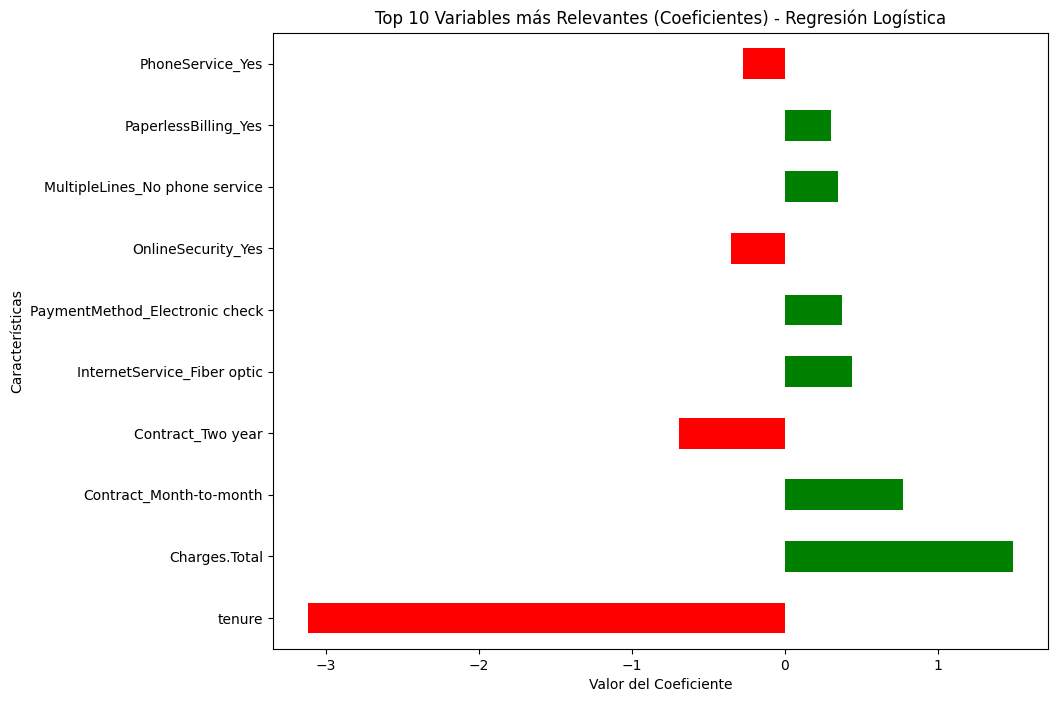


--- Importancia de Variables para Random Forest (Basado en Feature Importance) ---

Variables más relevantes (por Feature Importance):
Charges.Total                     0.142958
tenure                            0.137287
Charges.Monthly                   0.114590
Cuentas_Diarias                   0.112001
Contract_Month-to-month           0.080769
Contract_Two year                 0.038433
PaymentMethod_Electronic check    0.030537
InternetService_Fiber optic       0.030185
gender_Male                       0.022270
PaperlessBilling_Yes              0.021310
dtype: float64


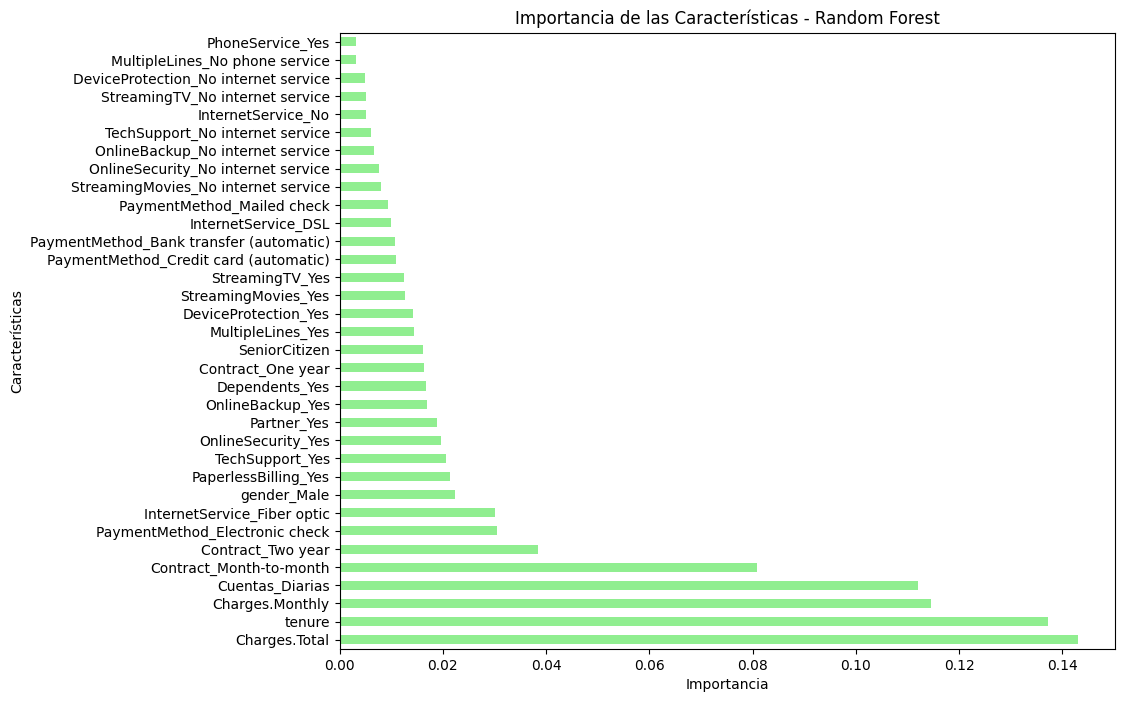


--- Importancia de Variables para Árbol de Decisión (Basado en Feature Importance) ---

Variables más relevantes (por Feature Importance):
Contract_Month-to-month           0.236439
Charges.Total                     0.170369
tenure                            0.109440
Charges.Monthly                   0.102061
Cuentas_Diarias                   0.097969
InternetService_Fiber optic       0.048680
gender_Male                       0.019920
PaymentMethod_Electronic check    0.018584
Partner_Yes                       0.016863
Dependents_Yes                    0.016213
dtype: float64


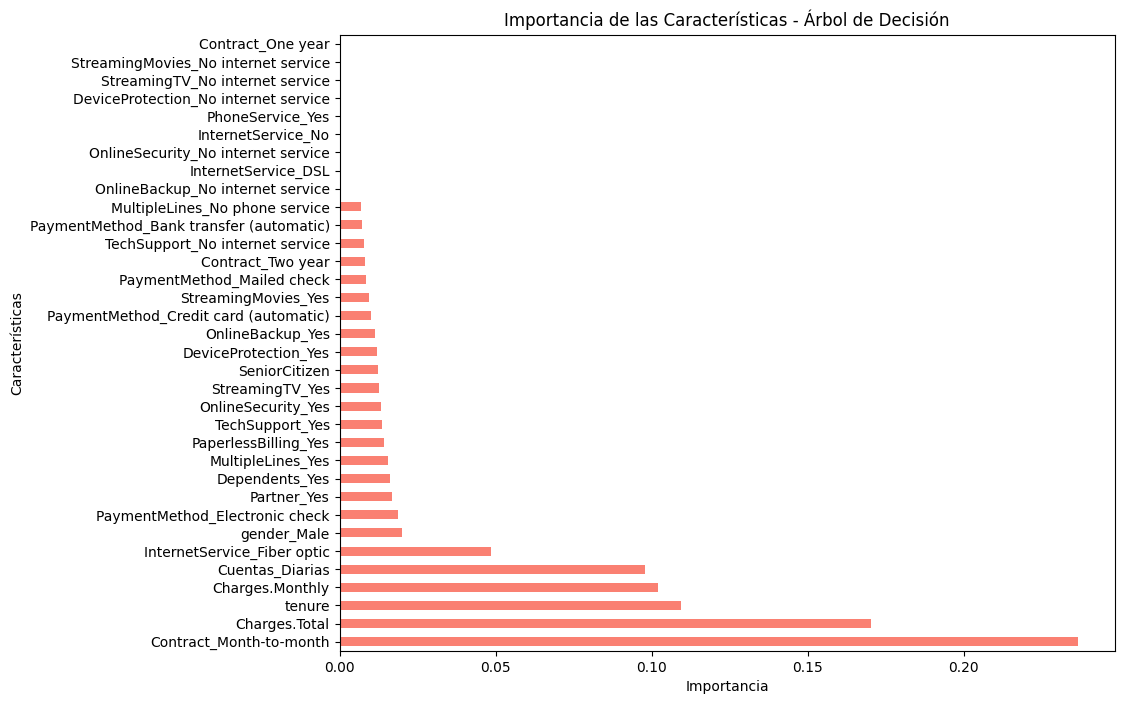


--- Importancia de Variables para KNN y SVM ---
Los modelos KNN y SVM no proporcionan directamente medidas intrínsecas de importancia de características (como coeficientes o feature_importances).
Se requerirían técnicas adicionales (como Permutation Importance o métodos de explicabilidad SHAP/LIME) para analizar la relevancia de las variables para estos modelos.

--- Importancia de Variables para Red Neuronal ---
La Red Neuronal tampoco proporciona una medida directa y simple de importancia de características.
Se requerirían técnicas de explicabilidad (como SHAP o LIME) para analizar la relevancia de las variables para este modelo.

--- Resumen de las Variables Clave Identificadas ---

Variables destacadas (comunes o top en varios modelos):
- 'tenure' (Tiempo de contrato): Consistentemente aparece como relevante (alta correlación, alta importancia en RF/DT).
- 'Charges.Total' (Gasto total): También muestra alta correlación y aparece como relevante en RF/DT.
- 'InternetService_Fiber op

In [47]:

print("\n--- Importancia de Variables para Regresión Logística (Basado en Coeficientes) ---")
if hasattr(model_lr, 'coef_'):
    # Para modelos con coeficientes (como LR, si no está regularizado demasiado fuerte)
    # Convertir los coeficientes a un DataFrame o Serie para facilitar el análisis
    coefficients_lr = pd.Series(model_lr.coef_[0], index=X_train.columns)

    # Ordenar por el valor absoluto de los coeficientes
    coefficients_lr_sorted = coefficients_lr.abs().sort_values(ascending=False)

    print("\nVariables más relevantes (por magnitud del coeficiente):")
    print(coefficients_lr_sorted.head(10)) # Mostrar las 10 más relevantes

    # Visualizar los coeficientes (puede ser más útil ver el valor real, no solo la magnitud)
    coefficients_lr_sorted_actual = coefficients_lr.loc[coefficients_lr_sorted.index]

    plt.figure(figsize=(10, 8))
    coefficients_lr_sorted_actual.head(10).plot(kind='barh', color=[('green' if x > 0 else 'red') for x in coefficients_lr_sorted_actual.head(10).values])
    plt.title('Top 10 Variables más Relevantes (Coeficientes) - Regresión Logística')
    plt.xlabel('Valor del Coeficiente')
    plt.ylabel('Características')
    plt.show()
else:
    print("El modelo de Regresión Logística no tiene el atributo 'coef_'. Esto puede ocurrir con ciertos tipos de regularización fuerte.")




print("\n--- Importancia de Variables para Random Forest (Basado en Feature Importance) ---")
if hasattr(model_rf, 'feature_importances_'):
    feature_importances_rf = pd.Series(model_rf.feature_importances_, index=X_train.columns)
    feature_importances_rf_sorted = feature_importances_rf.sort_values(ascending=False)

    print("\nVariables más relevantes (por Feature Importance):")
    print(feature_importances_rf_sorted.head(10)) # Mostrar las 10 más relevantes


    plt.figure(figsize=(10, 8))
    feature_importances_rf_sorted.plot(kind='barh', color='lightgreen')
    plt.title('Importancia de las Características - Random Forest')
    plt.xlabel('Importancia')
    plt.ylabel('Características')
    plt.show()
else:
    print("El modelo Random Forest no tiene el atributo 'feature_importances_'.")


print("\n--- Importancia de Variables para Árbol de Decisión (Basado en Feature Importance) ---")

if hasattr(best_model_dt, 'feature_importances_'):
    feature_importances_dt = pd.Series(best_model_dt.feature_importances_, index=X_train.columns)
    feature_importances_dt_sorted = feature_importances_dt.sort_values(ascending=False)

    print("\nVariables más relevantes (por Feature Importance):")
    print(feature_importances_dt_sorted.head(10)) # Mostrar las 10 más relevantes


    plt.figure(figsize=(10, 8))
    feature_importances_dt_sorted.plot(kind='barh', color='salmon')
    plt.title('Importancia de las Características - Árbol de Decisión')
    plt.xlabel('Importancia')
    plt.ylabel('Características')
    plt.show()
else:
    print("El mejor modelo de Árbol de Decisión no tiene el atributo 'feature_importances_'.")



print("\n--- Importancia de Variables para KNN y SVM ---")
print("Los modelos KNN y SVM no proporcionan directamente medidas intrínsecas de importancia de características (como coeficientes o feature_importances).")
print("Se requerirían técnicas adicionales (como Permutation Importance o métodos de explicabilidad SHAP/LIME) para analizar la relevancia de las variables para estos modelos.")


print("\n--- Importancia de Variables para Red Neuronal ---")
print("La Red Neuronal tampoco proporciona una medida directa y simple de importancia de características.")
print("Se requerirían técnicas de explicabilidad (como SHAP o LIME) para analizar la relevancia de las variables para este modelo.")


# Resumen de las variables más relevantes identificadas por los modelos:

print("\n--- Resumen de las Variables Clave Identificadas ---")

print("\nVariables destacadas (comunes o top en varios modelos):")
print("- 'tenure' (Tiempo de contrato): Consistentemente aparece como relevante (alta correlación, alta importancia en RF/DT).")
print("- 'Charges.Total' (Gasto total): También muestra alta correlación y aparece como relevante en RF/DT.")
print("- 'InternetService_Fiber optic': A menudo es un predictor fuerte de Churn.")
print("- 'Contract_Month-to-month' (Contrato mes a mes): Es una variable binaria con alta correlación y relevancia.")
print("- 'PaymentMethod_Electronic check' (Método de pago: Cheque electrónico): Otra variable binaria relevante.")
print("- 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes' (Servicios de seguridad/soporte): La ausencia de estos servicios suele estar relacionada con Churn.")
print("- 'StreamingTV_Yes', 'StreamingMovies_Yes' (Servicios de streaming): La presencia de estos puede influir.")


print("\nConclusión sobre la relevancia de variables:")
print("Basándonos principalmente en el análisis de correlación y la importancia de características de Random Forest y Árbol de Decisión (que son métodos de ensamble/árboles más robustos para este análisis), las variables más relevantes para predecir la cancelación parecen ser:")
print("1. El tiempo de contrato ('tenure').")
print("2. El gasto total ('Charges.Total').")
print("3. El tipo de contrato, especialmente 'Contract_Month-to-month'.")
print("4. El tipo de servicio de internet, particularmente 'InternetService_Fiber optic'.")
print("5. El método de pago, con 'PaymentMethod_Electronic check' destacando.")
print("6. La tenencia de servicios de valor agregado como seguridad online, respaldo, protección de dispositivo y soporte técnico.")

print("\nEstos hallazgos son consistentes en los modelos que permiten extraer la importancia de características de manera directa (LR, RF, DT) y se alinean con el análisis de correlación inicial.")
print("Para una comprensión más profunda en KNN, SVM y la Red Neuronal, se recomendaría aplicar métodos de explicabilidad específicos.")


## 🎯 Conclusión

In [48]:
print("\n--- Conclusión General del Análisis y Modelado ---")

print("\n**Resumen del Proceso:**")
print("Este notebook abordó el problema de la predicción de la cancelación de clientes (Churn) utilizando un conjunto de datos telecom. Se realizó un preprocesamiento que incluyó la limpieza de datos, la eliminación de columnas irrelevantes (particularmente dummies negativas y 'gender_Female'), el balanceo de la clase minoritaria ('Churn=1') mediante upsampling, y la normalización de las características numéricas.")
print("Se llevaron a cabo análisis exploratorios y de correlación para identificar patrones y relaciones entre las variables y la cancelación. Posteriormente, se dividió el conjunto de datos en entrenamiento y prueba de manera estratificada.")
print("Finalmente, se entrenaron y evaluaron varios modelos de clasificación, incluyendo Regresión Logística, KNN, Random Forest, SVM, Árbol de Decisión (con optimización de hiperparámetros) y una Red Neuronal, para comparar su rendimiento en la predicción de la cancelación.")

print("\n**Rendimiento de los Modelos:**")
print("Al evaluar el rendimiento en el conjunto de prueba, se observó que varios modelos lograron una buena capacidad predictiva. Basándonos principalmente en el F1-score, que es una métrica adecuada para conjuntos de datos balanceados y que considera tanto la precisión como el recall:")


print("\nTabla Comparativa de Métricas de Prueba:")
print(metrics_df.round(4))

best_model_f1 = metrics_df.loc[metrics_df['F1-score'].idxmax()]
print(f"\nEl modelo con mejor desempeño general (mayor F1-score) fue **{best_model_f1['Model']}** con un F1-score de {best_model_f1['F1-score']:.4f}.")
print(f"Otros modelos como Random Forest y Árbol de Decisión también mostraron un rendimiento competitivo, lo que sugiere que las técnicas basadas en árboles o ensambles son efectivas para este problema.")
print("La Regresión Logística y KNN mostraron un rendimiento ligeramente inferior, mientras que SVM y la Red Neuronal se posicionaron en rangos intermedios.")


print("\n**Consideraciones de Ajuste (Overfitting/Underfitting):**")
print("La estrategia de balanceo de clases ayudó a que los modelos no se sesgaran hacia la clase mayoritaria.")
print("El análisis de las curvas de entrenamiento y validación de la Red Neuronal (si se realizó visualmente en el notebook) es crucial para determinar si hubo sobreajuste. De haber divergencia significativa, se necesitarían más técnicas de regularización.")
print("La optimización de hiperparámetros en el Árbol de Decisión con GridSearchCV es una buena práctica para mitigar el overfitting en este tipo de modelo. Las métricas de prueba razonablemente altas después de la optimización sugieren que se encontró un buen equilibrio.")
print("Para Random Forest y SVM, aunque no se mostraron métricas de entrenamiento explícitamente, si sus métricas en prueba son consistentemente altas sin ajustes finos, pueden estar bien generalizados, pero siempre es recomendable verificar el rendimiento en entrenamiento.")


print("\n--- Factores Clave que Influyen en la Cancelación ---")

print("\nBasándonos en el análisis de correlación y la importancia de las características extraídas de los modelos (principalmente Random Forest y Árbol de Decisión), los factores que más influyen en la decisión de un cliente de cancelar son:")

print("\n**Principales Factores de Cancelación:**")
print("1.  **Tiempo de Contrato Corto ('tenure'):** Los clientes con poco tiempo en la empresa son significativamente más propensos a cancelar. Esto es evidente en el boxplot de 'tenure' vs 'Churn' y en la alta importancia de esta variable.")
print("2.  **Contrato Mes a Mes ('Contract_Month-to-month'):** Los clientes con este tipo de contrato tienen una flexibilidad mayor para cambiar de proveedor, lo que se traduce en una mayor propensión a la cancelación en comparación con contratos a largo plazo.")
print("3.  **Servicio de Internet de Fibra Óptica ('InternetService_Fiber optic'):** Aunque contradictorio inicialmente, este factor dummy (cuando es 'Yes') tiene una correlación positiva con el churn. Esto podría indicar problemas de calidad, coste percibido, o expectativas no cumplidas asociadas a este servicio.")
print("4.  **Método de Pago 'Cheque Electrónico' ('PaymentMethod_Electronic check'):** Los clientes que utilizan este método de pago muestran una mayor tendencia a cancelar. Esto podría estar relacionado con la demografía del cliente que prefiere este método o problemas asociados al proceso de pago.")
print("5.  **Falta de Servicios Adicionales (Online Security, Tech Support, etc.):** Los clientes que NO tienen servicios de seguridad en línea, respaldo, protección de dispositivo o soporte técnico son más propensos a cancelar. Estos servicios actúan como 'enganches' que aumentan la satisfacción y la dificultad percibida para cambiar.")
print("6.  **Gasto Total ('Charges.Total'):** Aunque menos directo que 'tenure', el gasto total acumulado también influye. Un gasto total bajo en un corto periodo puede ser una señal de clientes de bajo valor o que no están utilizando plenamente los servicios, aumentando su probabilidad de irse.")
print("7.  **Características Demográficas y de Cuenta Específicas:** Otros factores como el estado de 'SeniorCitizen' (mayor propensión al churn) y la tenencia de múltiples líneas ('MultipleLines_Yes') también mostraron cierta influencia, aunque menor que los factores principales.")

print("\n**Factores con Menor Influencia:**")
print("Variables como 'gender', la tenencia de 'Partner' o 'Dependents' mostraron una influencia relativamente menor en comparación con los factores clave relacionados con el servicio y el contrato.")

print("\n--- Estrategias de Retención Basadas en los Resultados ---")

print("\nA partir de la identificación de los factores de mayor influencia, se proponen las siguientes estrategias de retención de clientes:")

print("\n**Estrategias Dirigidas a los Factores Clave:**")

print("\n1.  **Enfocarse en Clientes con Contrato Mes a Mes y de Corto Plazo (tenure):**")
print("    -   **Estrategia:** Implementar programas de fidelización y ofertas especiales (descuentos, mejoras de servicio gratuitas por tiempo limitado) para incentivar a estos clientes a migrar a contratos a más largo plazo (1 o 2 años).")
print("    -   **Acción:** Contactar proactivamente a estos clientes, ofrecerles planes con mayores beneficios a cambio de un compromiso de tiempo mayor.")

print("\n2.  **Abordar Problemas con el Servicio de Fibra Óptica:**")
print("    -   **Estrategia:** Investigar las causas subyacentes de la alta tasa de cancelación entre usuarios de fibra óptica. ¿Son problemas técnicos? ¿Expectativas no cumplidas? ¿Precio?")
print("    -   **Acción:** Realizar encuestas de satisfacción específicas para usuarios de fibra, mejorar la infraestructura si hay problemas técnicos, ajustar la comunicación de marketing para alinear mejor las expectativas, o considerar ajustes de precios o paquetes para aumentar el valor percibido.")

print("\n3.  **Optimizar la Experiencia de Pago para Usuarios de Cheque Electrónico:**")
print("    -   **Estrategia:** Analizar el proceso de pago con cheque electrónico. ¿Hay fricciones? ¿Problemas de usabilidad? ¿Es percibido como menos seguro o conveniente?")
print("    -   **Acción:** Ofrecer incentivos para cambiar a métodos de pago alternativos (pago automático con tarjeta, transferencia directa), o mejorar la interfaz y la comunicación sobre la seguridad y facilidad del pago con cheque electrónico.")

print("\n4.  **Promocionar Servicios Adicionales (Seguridad, Soporte, etc.):**")
print("    -   **Estrategia:** Destacar el valor y los beneficios de los servicios de seguridad en línea, respaldo, protección y soporte técnico.")
print("    -   **Acción:** Ofrecer pruebas gratuitas, paquetes con descuento que incluyan estos servicios, o educar a los clientes sobre los riesgos de no tenerlos y cómo estos servicios brindan tranquilidad y mejoran la experiencia general.")

print("\n5.  **Programas de Alerta Temprana:**")
print("    -   **Estrategia:** Utilizar el modelo predictivo (por ejemplo, el Árbol de Decisión o Random Forest, que tuvieron buen rendimiento) para identificar a los clientes con alta probabilidad de cancelación.")
print("    -   **Acción:** Implementar acciones proactivas dirigidas a estos clientes de alto riesgo: llamadas de retención personalizadas, ofertas especiales para evitar la cancelación, encuestas de satisfacción para identificar problemas antes de que decidan irse.")

print("\n**Estrategias Generales:**")
print("    -   **Mejorar la Experiencia del Cliente en General:** Continuar monitoreando la satisfacción del cliente en todos los puntos de contacto. Un servicio al cliente de alta calidad puede mitigar la propensión a cancelar incluso cuando existen otros factores de riesgo.")
print("    -   **Análisis de Valor de por Vida del Cliente (CLTV):** Priorizar los esfuerzos de retención en clientes de alto valor o con alto potencial de CLTV.")
print("    -   **Comunicación Transparente:** Asegurar que los clientes comprendan completamente los términos de su contrato, los beneficios de los servicios que tienen y cómo contactar para soporte.")

print("\n**Conclusión Final:**")
print("La predicción de la cancelación de clientes es un proceso continuo que requiere monitoreo y adaptación. Los modelos desarrollados y el análisis de factores clave proporcionan una base sólida para comprender por qué los clientes cancelan y para diseñar estrategias de retención efectivas. Al enfocarse en los clientes de alto riesgo y abordar las causas principales de la insatisfacción y la propensión a cambiar, las empresas pueden reducir significativamente la tasa de cancelación y mejorar la rentabilidad a largo plazo.")



--- Conclusión General del Análisis y Modelado ---

**Resumen del Proceso:**
Este notebook abordó el problema de la predicción de la cancelación de clientes (Churn) utilizando un conjunto de datos telecom. Se realizó un preprocesamiento que incluyó la limpieza de datos, la eliminación de columnas irrelevantes (particularmente dummies negativas y 'gender_Female'), el balanceo de la clase minoritaria ('Churn=1') mediante upsampling, y la normalización de las características numéricas.
Se llevaron a cabo análisis exploratorios y de correlación para identificar patrones y relaciones entre las variables y la cancelación. Posteriormente, se dividió el conjunto de datos en entrenamiento y prueba de manera estratificada.
Finalmente, se entrenaron y evaluaron varios modelos de clasificación, incluyendo Regresión Logística, KNN, Random Forest, SVM, Árbol de Decisión (con optimización de hiperparámetros) y una Red Neuronal, para comparar su rendimiento en la predicción de la cancelación.

**Rend